# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "?q=" + city + "&appid=" + weather_api_key 
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Set the Get request 
        response = requests.get(city_url)
        
        
        # Parse the JSON and retrieve data
        city_weather = response.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nago
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | richards bay
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 1 | hadibu
Processing Record 8 of Set 1 | vadso
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | coxen hole
Processing Record 12 of Set 1 | sao felix do xingu
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | marang
Processing Record 15 of Set 1 | lloydminster
Processing Record 16 of Set 1 | la'ie
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | morehead city
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | lua

Processing Record 38 of Set 4 | keflavik
Processing Record 39 of Set 4 | midelt
Processing Record 40 of Set 4 | egilsstadir
Processing Record 41 of Set 4 | mugia
Processing Record 42 of Set 4 | vilyuchinsk
Processing Record 43 of Set 4 | portage la prairie
Processing Record 44 of Set 4 | levuka
Processing Record 45 of Set 4 | ilha de mocambique
Processing Record 46 of Set 4 | kulhudhuffushi
Processing Record 47 of Set 4 | chauk
Processing Record 48 of Set 4 | rongelap
Processing Record 49 of Set 4 | kataragama
City not found. Skipping...
Processing Record 0 of Set 5 | aasiaat
Processing Record 1 of Set 5 | al bawiti
Processing Record 2 of Set 5 | dzhambeyty
Processing Record 3 of Set 5 | strovolos
Processing Record 4 of Set 5 | progreso
Processing Record 5 of Set 5 | neiafu
Processing Record 6 of Set 5 | palikir - national government center
Processing Record 7 of Set 5 | puerto aysen
Processing Record 8 of Set 5 | lashio
Processing Record 9 of Set 5 | sao vicente
Processing Record 10 o

Processing Record 27 of Set 8 | khvansar
Processing Record 28 of Set 8 | brookings
Processing Record 29 of Set 8 | leongatha
Processing Record 30 of Set 8 | saint-gilles
Processing Record 31 of Set 8 | nar'yan-mar
Processing Record 32 of Set 8 | tetouan
Processing Record 33 of Set 8 | queenstown
Processing Record 34 of Set 8 | luderitz
Processing Record 35 of Set 8 | quellon
Processing Record 36 of Set 8 | manado
Processing Record 37 of Set 8 | kodar
Processing Record 38 of Set 8 | kimbe
Processing Record 39 of Set 8 | swakopmund
Processing Record 40 of Set 8 | wewak
Processing Record 41 of Set 8 | rozhniv
Processing Record 42 of Set 8 | maubin
Processing Record 43 of Set 8 | leava
Processing Record 44 of Set 8 | weno
Processing Record 45 of Set 8 | ulsteinvik
Processing Record 46 of Set 8 | odesskoye
Processing Record 47 of Set 8 | sile
Processing Record 48 of Set 8 | bend
Processing Record 49 of Set 8 | sassandra
Processing Record 0 of Set 9 | ubari
Processing Record 1 of Set 9 | asu

Processing Record 16 of Set 12 | atlantic
Processing Record 17 of Set 12 | vila franca do campo
Processing Record 18 of Set 12 | khandyga
Processing Record 19 of Set 12 | anna regina
Processing Record 20 of Set 12 | buka
Processing Record 21 of Set 12 | twon-brass
Processing Record 22 of Set 12 | nadi
Processing Record 23 of Set 12 | canico
Processing Record 24 of Set 12 | xiva
Processing Record 25 of Set 12 | revda
Processing Record 26 of Set 12 | conceicao da barra
Processing Record 27 of Set 12 | kargil
Processing Record 28 of Set 12 | swift current
Processing Record 29 of Set 12 | moussoro
Processing Record 30 of Set 12 | la ronge
Processing Record 31 of Set 12 | elin pelin
Processing Record 32 of Set 12 | muborak
Processing Record 33 of Set 12 | gore
Processing Record 34 of Set 12 | griffith
Processing Record 35 of Set 12 | juan griego
Processing Record 36 of Set 12 | huanta
Processing Record 37 of Set 12 | dhari
Processing Record 38 of Set 12 | dunedin
Processing Record 39 of Set

In [4]:
response = requests.get(city_url)
response

<Response [200]>

In [5]:
city_weather

{'coord': {'lon': 122.1353, 'lat': 7.7061},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 299.5,
  'feels_like': 299.5,
  'temp_min': 299.5,
  'temp_max': 299.5,
  'pressure': 1011,
  'humidity': 89,
  'sea_level': 1011,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 2.1, 'deg': 109, 'gust': 2.31},
 'clouds': {'all': 100},
 'dt': 1696164517,
 'sys': {'country': 'PH', 'sunrise': 1696109972, 'sunset': 1696153384},
 'timezone': 28800,
 'id': 1686123,
 'name': 'Siocon',
 'cod': 200}

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nago,26.5881,127.9761,300.62,83,45,6.31,JP,1696164298
1,port-aux-francais,-49.3500,70.2167,278.83,97,100,15.85,TF,1696163925
2,jamestown,42.0970,-79.2353,287.92,100,100,0.45,US,1696163934
3,richards bay,-28.7830,32.0377,291.94,64,100,5.20,ZA,1696164300
4,punta arenas,-53.1500,-70.9167,277.21,70,40,10.29,CL,1696163997


In [8]:
#Convert the temperature from Kelvin to Celsius

city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nago,26.5881,127.9761,27.47,83,45,6.31,JP,1696164298
1,port-aux-francais,-49.3500,70.2167,5.68,97,100,15.85,TF,1696163925
2,jamestown,42.0970,-79.2353,14.77,100,100,0.45,US,1696163934
3,richards bay,-28.7830,32.0377,18.79,64,100,5.20,ZA,1696164300
4,punta arenas,-53.1500,-70.9167,4.06,70,40,10.29,CL,1696163997


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nago,26.5881,127.9761,27.47,83,45,6.31,JP,1696164298
1,port-aux-francais,-49.3500,70.2167,5.68,97,100,15.85,TF,1696163925
2,jamestown,42.0970,-79.2353,14.77,100,100,0.45,US,1696163934
3,richards bay,-28.7830,32.0377,18.79,64,100,5.20,ZA,1696164300
4,punta arenas,-53.1500,-70.9167,4.06,70,40,10.29,CL,1696163997


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

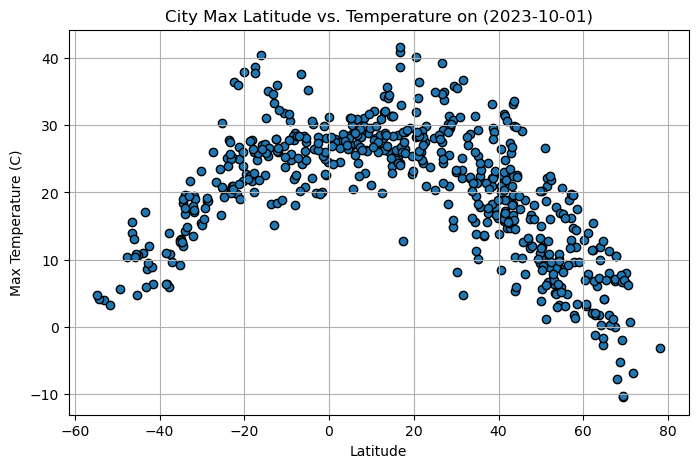

In [11]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]


#temperature_fahrenheit = city_data_df["Max Temp"]
temperature = city_data_df["Max Temp"]
date = city_data_df["Date"] 


# Convert the date to a human-readable format (e.g., YYYY-MM-DD)
formatted_date = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')



plt.figure(figsize=(8, 5))
plt.scatter(latitude, temperature, marker="o", edgecolors="black")
#plt.scatter(latitude, temperature, marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")  # You can specify the unit you prefer
plt.title(f"City Max Latitude vs. Temperature on ({formatted_date.iloc[0]})")# Using the first date as an example
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

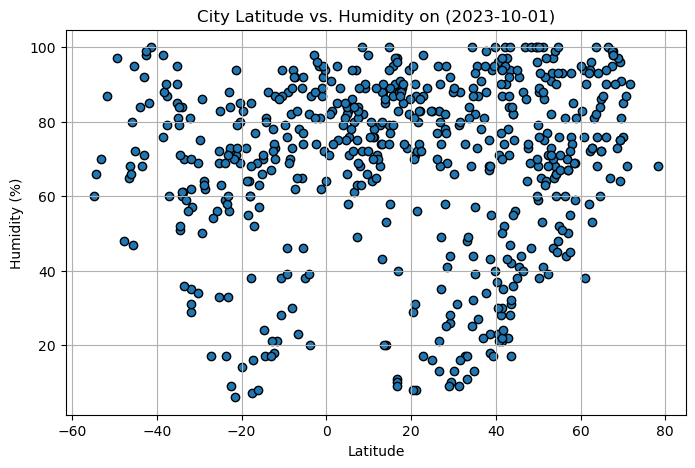

In [12]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
date = city_data_df["Date"]  # Since the date is stored as a timestamp

# Convert the date to a human-readable format (e.g., YYYY-MM-DD)
formatted_date = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')

plt.figure(figsize=(8, 5))  
plt.scatter(latitude, humidity, marker="o",edgecolors="black")


# Incorporate the other graph properties
# Add labels and title with the formatted date
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity on ({formatted_date.iloc[0]})")  # Using the first date as an example
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

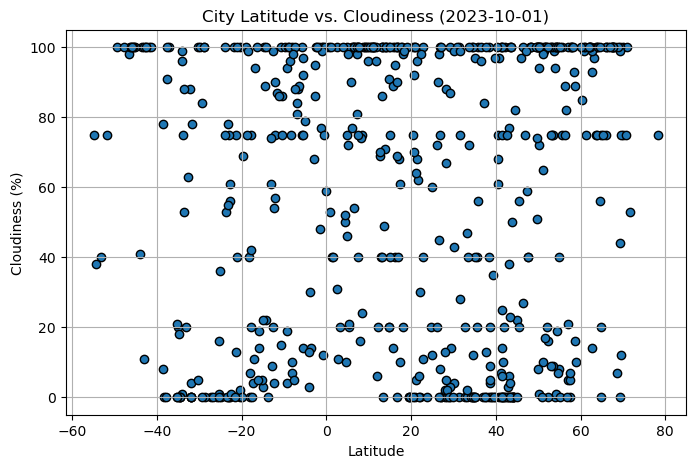

In [13]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
date = city_data_df["Date"]  # Assuming the date is stored as a timestamp

# Convert the date to a human-readable format (e.g., YYYY-MM-DD)
formatted_date = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')


plt.figure(figsize=(8, 5))  # Set the figure size (optional)
plt.scatter(latitude, cloudiness, marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({formatted_date.iloc[0]})")  # Use the first date as an example

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

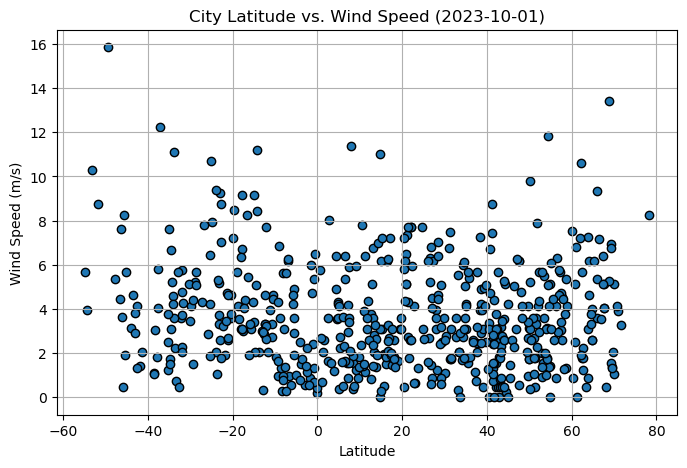

In [14]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
date = city_data_df["Date"]  # Assuming the date is stored as a timestamp

# Convert the date to a human-readable format (e.g., YYYY-MM-DD)
formatted_date = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')

plt.figure(figsize=(8, 5))  # Set the figure size (optional)
plt.scatter(latitude, wind_speed, marker="o",edgecolors="black")

# Incorporate the other graph properties
# Add labels and title with the formatted date
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")  # You can specify the unit you prefer
plt.title(f"City Latitude vs. Wind Speed ({formatted_date.iloc[0]})")  # Use the first date as an example
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_data, y_data, x_coord, y_coord):
    #Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    #Using the linear regression function created previously
    regression_line = slope * x_data + intercept

    #Create a scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x_data, y_data, marker="o")

    #Plot the regression line
    plt.plot(x_data, regression_line, color='red')

    #Add labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_data.name)


    #Display the correlation coefficient (r-value) above the plot
    correlation_text = f"The r-value is :{r_value**2}"
    plt.text(0,1.1, correlation_text, transform=plt.gca().transAxes, fontsize=11, color='black')


    #Add the linear regression equation to the plot
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation_text, (x_coord, y_coord), fontsize=15, color='red')


    # Show the plot
    plt.show()

    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

# Filter data for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nago,26.5881,127.9761,27.47,83,45,6.31,JP,1696164298
2,jamestown,42.0970,-79.2353,14.77,100,100,0.45,US,1696163934
5,hadibu,12.6500,54.0333,28.12,79,69,0.81,YE,1696164069
6,vadso,70.0744,29.7487,8.09,76,100,1.03,NO,1696164049
8,tazovsky,67.4667,78.7000,-0.04,95,100,6.40,RU,1696163923


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

# Filter data for the Southern Hemisphere (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] <= 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.68,97,100,15.85,TF,1696163925
3,richards bay,-28.7830,32.0377,18.79,64,100,5.20,ZA,1696164300
4,punta arenas,-53.1500,-70.9167,4.06,70,40,10.29,CL,1696163997
7,waitangi,-43.9535,-176.5597,11.01,84,41,3.13,NZ,1696163921
10,sao felix do xingu,-6.6447,-51.9950,37.56,23,88,0.97,BR,1696164086


###  Temperature vs. Latitude Linear Regression Plot

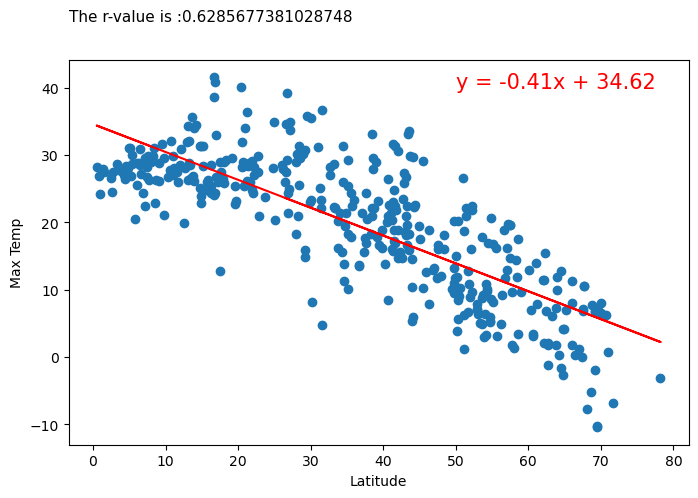

In [18]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Max Temp"]

#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, 50, 40)


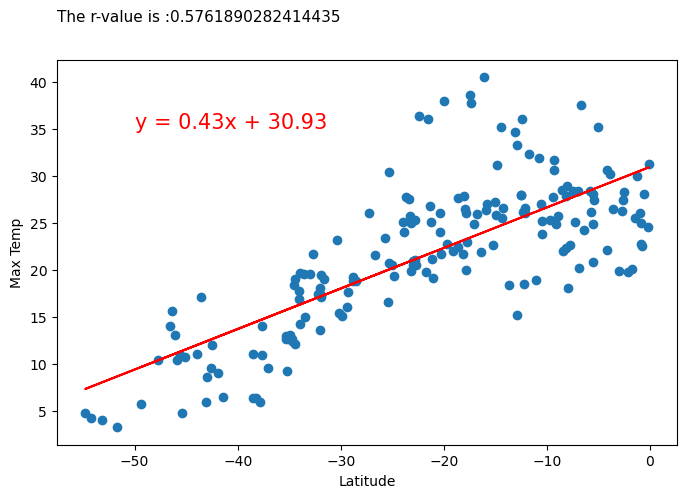

In [19]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Max Temp"]


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, -50, 35)

### Temperature  vs. Latitude Linear Relationship


### From Northern Hemisphere

- It can be seen that the correlation coefficient is 0.6 there is good correlation.

- As the gardient is -0.4 and the linear regression line is negative. 

- It shows in northern hemisphere, latitude have asignificant linear realtionship. As if the latitude changes, there will be negative changes in the temperature.




### From Southern Hemishere

- It can be seen that the correlation coefficient is 0.5 there is decent correlation.

- As the gardient is 0.4 and the linear regression line is almost 45 degree. 

- It shows in southern hemisphere, latitude have asignificant linear realtionship. As if the latitude changes, there will be relative change in the temperature. 





### Humidity vs. Latitude Linear Regression Plot

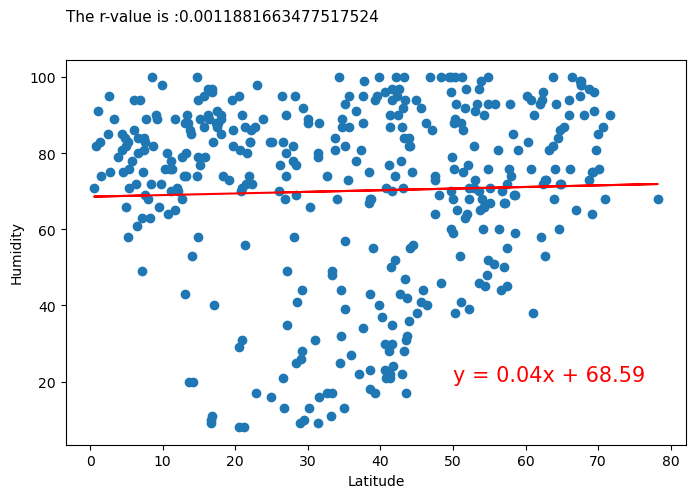

In [20]:
# Northern Hemisphere

# Extract the data for the Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Humidity"]  # Use "Humidity" as Y data


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, 50, 20)

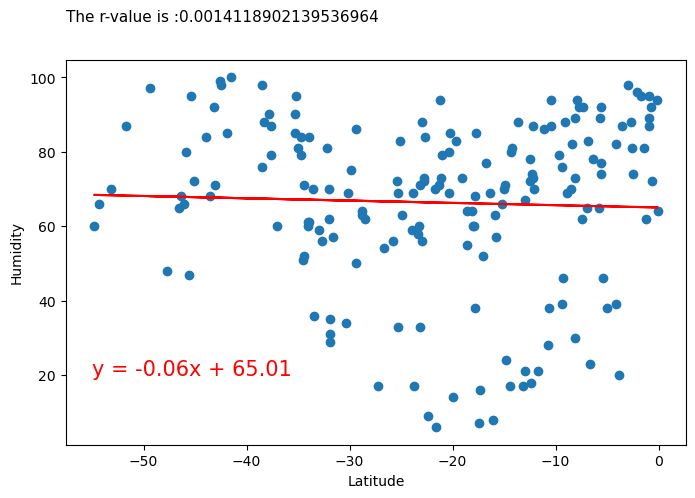

In [21]:
# Southern Hemisphere

# Extract the data for the Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Humidity"] 


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, -55, 20)

### Humidity  vs. Latitude Linear Relationship


### From Northern Hemisphere

- It shows that the correlation coefficient is quite about 0 and there is almost no  correlation between humidity and latitude.

- In northern hemisphere, latitude have a very weak linear realtionship. As if the latitude changes, there will be no changes in the humidity. 

- As the gardient is also clolse to 0 and the linear regression line is almost prallel to the x-axis. 




### From Southern Hemishere

- It can be seen that the correlation coefficient is about neagitive 0 and we can depicts that there is very weak correlation.

- As the gardient is also clolse to 0 and the linear regression line is almost prallel to the x-axis. 

- It shows in southern hemisphere, latitude have a very weak linear realtionship. As if the latitude changes, there will be almsot no change in the humidity. 





### Cloudiness vs. Latitude Linear Regression Plot

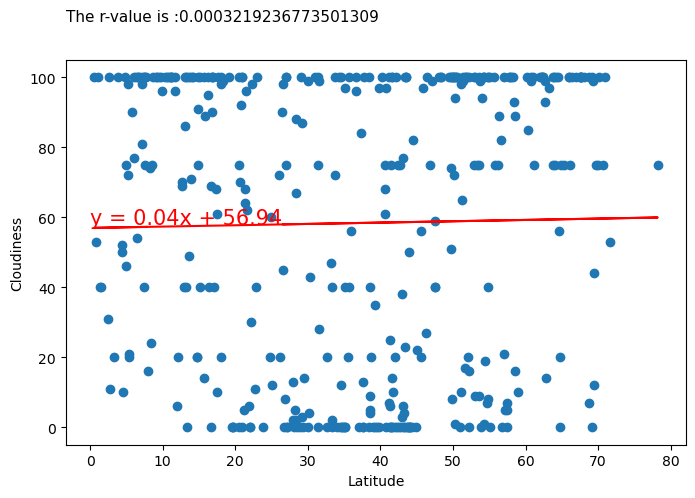

In [22]:
# Northern Hemisphere

# Extract the data for the Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Cloudiness"]


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, 0, 58)

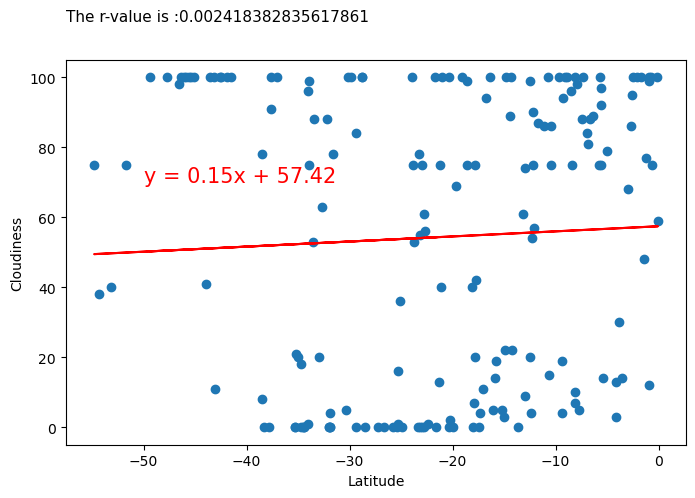

In [23]:
# Southern Hemisphere

# Extract the data for the Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Cloudiness"]

#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, -50, 70)

### Cloudiness vs. Latitude Linear Relationship


### From Northern Hemisphere

- It shows that the correlation coefficient is almost 0 and we can depicts that there is almost no  correlation between cloudiness and latitude.

- In northern hemisphere, latitude have a very weak linear realtionship. As if the latitude changes, there will be no changes in the cloudiness. 

- As the gardient is also clolse to 0 and the linear regression line is almost prallel to the x-axis. 




### From Southern Hemishere

- It can be seen that the correlation coefficient is almost 0 and we can depicts that there is very weak correlation.

- As the gardient is also clolse to 0 and the linear regression line is almost prallel to the x-axis. 

- It shows in southern hemisphere, latitude have a very weak linear realtionship. As if the latitude changes, there will be almsot no change in the cloudiness. 





### Wind Speed vs. Latitude Linear Regression Plot

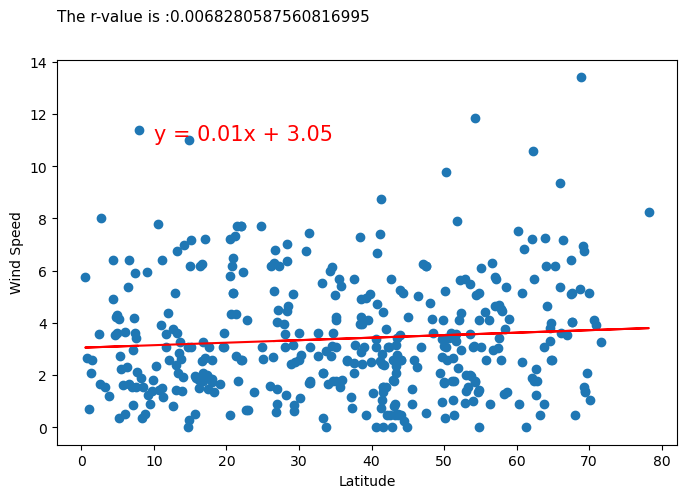

In [24]:
# Northern Hemisphere

# Extract the data for the Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Wind Speed"]


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, 10, 11)

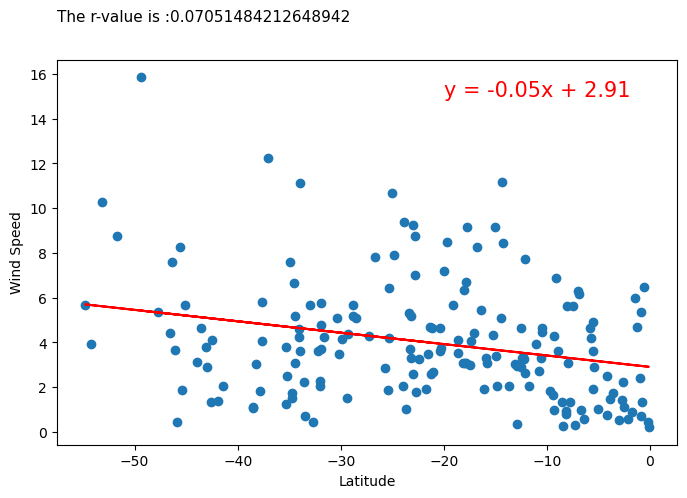

In [25]:
# Southern Hemisphere

# Extract the data for the Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Wind Speed"]


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, -20, 15)

### Wind Speed vs. Latitude Linear Relationship


### From Northern Hemisphere

- It crystal clear the correlation coefficient is almost 0 and we can depicts that the correlation is almost have near to no such a linear relationship.

- In northern hemisphere, latitude have a very weak linear realtionship. As if the latitude changes, there will be no changes in the wind speed. 

- As the gardient is also clolse to 0 and the linear regression line is almost prallel to the x-axis. 




### From Southern Hemishere

- It can be seen that the correlation coefficient is almost 0 and we can depicts that the correlation is poor and have weak linear relationship.

- As the gardient is also clolse to 0 and the linear regression line is almost prallel to the x-axis. 

- It shows in southern hemisphere, latitude have a very weak linear realtionship. As if the latitude changes, there will be no significant change in the wind speed. 



